<a href="https://colab.research.google.com/github/louisnoel/RCEL506_Project/blob/Louis-updates/RCEL_506_CCS_Analysis_Louis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Raw GHG Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [2]:
import pandas as pd
import numpy as np

# 2020 GHG emissions data
url1 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_data_2020.csv'
df1 = pd.read_csv(url1)

In [3]:
# Rows and columns
df1.shape

(6515, 66)

In [4]:
# All headings
print(list(df1.columns))

['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Zip Code', 'Address', 'County', 'Latitude', 'Longitude', 'Primary NAICS Code', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Total reported direct emissions', 'CO2 emissions (non-biogenic)', 'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ', 'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Other GHGs (metric tons CO2e)', 'Biogenic CO2 emissions (metric tons)', 'Stationary Combustion', 'Electricity Generation', 'Adipic Acid Production', 'Aluminum Production', 'Ammonia Manufacturing', 'Cement Production', 'Electronics Manufacture', 'Ferroalloy Production', 'Fluorinated GHG Production', 'Glass Production', 'HCFC22 Production from HFC23 Destruction', 'Hydrogen Production', 'Iron and Steel Production', 'Lead Production', 'Lime Production', 'Magnesium Production', 'Miscellaneous Use of Carbonat

In [5]:
# Data preview

df1.head(3)

,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
0,1004377,1.100000e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.30,-96.54,...,NaN,NaN,NaN,504064.0,NaN,NaN,NaN,N,N,N
1,1000112,1.100000e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,-74.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
2,1013621,1.100000e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.54,-103.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [6]:
# Meta Data
# Checking for data type (int/float v. object) and missing data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 66 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Facility Id                                                      6515 non-null   int64  
 1   FRS Id                                                           6405 non-null   float64
 2   Facility Name                                                    6515 non-null   object 
 3   City                                                             6515 non-null   object 
 4   State                                                            6515 non-null   object 
 5   Zip Code                                                         6515 non-null   int64  
 6   Address                                                          6038 non-null   object 
 7   County                                    

### Data Cleaning

- Removing columns not relevant to analysis
- Separating into two dataframes - Facility Summary and Industry Emissions Summary
  - ***Facility Summary***: facility name/ID, state/city, latitude/longitude, regulation subparts, industry type, CO2e (including biogenic)
  - ***Industry Emissions Summary***: emissions by process/industry, checks for utilization and injection of CO2

#### Facility Summary

In [7]:
# Create new df for summary of site information

facilities=df1.iloc[:,[2,3,4,5,8,9,11,12,13,14,25]]
facilities.index=df1['Facility Id']
facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons)
Facility Id,,,,,,,,,,,
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,33.30,-96.54,HH,Waste,504064.00,NaN,NaN
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN


In [8]:
# Checking if all data is present
# Exceptions - facilities with non-CO2 GHG emissions only (e.g. refrigerants)
# Exception - facilities with some or all CO2 emissions as biogenic

facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1004377 to 1011696
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         6515 non-null   object 
 1   City                                  6515 non-null   object 
 2   State                                 6515 non-null   object 
 3   Zip Code                              6515 non-null   int64  
 4   Latitude                              6515 non-null   float64
 5   Longitude                             6515 non-null   float64
 6   Industry Type (subparts)              6515 non-null   object 
 7   Industry Type (sectors)               6515 non-null   object 
 8   Total reported direct emissions       6515 non-null   float64
 9   CO2 emissions (non-biogenic)          5858 non-null   float64
 10  Biogenic CO2 emissions (metric tons)  564 non-null    float64
dtypes: float

In [9]:
# Exclude all sources reporting only non-CO2 GHGs (e.g. CH4, refrigerants, etc) 
# For each source, check if either biogenic or non-biogenic column has a value
# Only keep the sources that satisfy this condition - np.logical_or()

biogenic=facilities['Biogenic CO2 emissions (metric tons)'].notna()
non_biogenic=facilities['CO2 emissions (non-biogenic)'].notna()
co2_filter = np.logical_or(biogenic,non_biogenic)
co2_facilities = facilities[co2_filter]

In [10]:
# 5896 sources are applicable for this project
# 564 sources with some amount of biogenic CO2
# 38 sources with only biogenic CO2

co2_facilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 1000112 to 1011696
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         5896 non-null   object 
 1   City                                  5896 non-null   object 
 2   State                                 5896 non-null   object 
 3   Zip Code                              5896 non-null   int64  
 4   Latitude                              5896 non-null   float64
 5   Longitude                             5896 non-null   float64
 6   Industry Type (subparts)              5896 non-null   object 
 7   Industry Type (sectors)               5896 non-null   object 
 8   Total reported direct emissions       5896 non-null   float64
 9   CO2 emissions (non-biogenic)          5858 non-null   float64
 10  Biogenic CO2 emissions (metric tons)  564 non-null    float64
dtypes: float

In [11]:
# Facilities not considered
# 5896 + 619 = 6515 total sources (as in original dataframe)

missing_non_bio=facilities['CO2 emissions (non-biogenic)'].isna()     # no value
missing_bio=facilities['Biogenic CO2 emissions (metric tons)'].isna() # no value
filter = np.logical_and(missing_non_bio,missing_bio)
non_co2_facilities = facilities[filter]
non_co2_facilities.shape

(619, 11)

#### Industry Emissions Summary
- Creating dataframe for industrial sector emissions from each facility
- Facility may be reporting under multiple industrial sectors (i.e. subparts)

In [12]:
# Create new df for emissions data by industrial sector
# Include non-biogenic & biogenic data columns to allow for filtering

emissions = df1.loc[:,['CO2 emissions (non-biogenic)','Biogenic CO2 emissions (metric tons)']]
emissions.index = df1['Facility Id']
sectors = df1.iloc[:,26:]
sectors.index = df1['Facility Id']
industries = pd.concat([emissions,sectors],axis=1) # concatenate df's together
industries.shape

(6515, 42)

In [13]:
# Exclude all sources reporting only non-CO2 GHGs (e.g. CH4, refrigerants, etc) 
# For each source, check if either biogenic or non-biogenic column has a value
# Only keep the sources that satisfy this condition - np.logical_or()

biogenic=industries['Biogenic CO2 emissions (metric tons)'].notna()
non_biogenic=industries['CO2 emissions (non-biogenic)'].notna()
co2_filter = np.logical_or(biogenic,non_biogenic)
co2_industries = industries[co2_filter]

# Drop non-biogenic & biogenic data columns

co2_industries=co2_industries.drop(columns=['Biogenic CO2 emissions (metric tons)',
                                            'CO2 emissions (non-biogenic)'])
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,199.10,60620.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1013621,29729.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,335.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100165.5,NaN,NaN,NaN,N,N,N


## Regulatory Subpart Data

### Data Import and EDA

- Pull in data stored in Github
- Understand dataframe layout and basic attributes

In [14]:
import pandas as pd
import numpy as np

# Regulatory subparts for each industry

url2 = 'https://raw.githubusercontent.com/edanyi/ed_RCEL506/main/ghgp_industries.csv'
df2 = pd.read_csv(url2)

In [15]:
# Setting index as the regulatory subpart letter

df2.index = df2['Subpart Letter']
subparts = df2.loc[:,['Name of industry','Facility Type']]
subparts.head(3)

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter


In [16]:
# Checking if all data is present

subparts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, C to UU
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name of industry  56 non-null     object
 1   Facility Type     56 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


## Clean Data Summary

- 3 dataframes are generated to summarize the data for this analysis
  - ***co2_facilities***: all US industrial facilities that emit CO2 emissions (2020 data)
  - ***subparts***: correlates EPA GHG reporting program regulatory subpart (CFR Part 98) to each type of industry
  - ***co2_industries***: CO2 emissions for each facility, broken down by regulatory subpart (i.e. industry)

In [17]:
co2_facilities.head(3)

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons)
Facility Id,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN


In [18]:
subparts.head()

,Name of industry,Facility Type
Subpart Letter,,
C,Stationary Combustion,Direct Emitter
D,Electricity Generation,Direct Emitter
E,Adipic Acid Production,Direct Emitter
F,Aluminum Production,Direct Emitter
G,Ammonia Manufacturing,Direct Emitter


In [19]:
co2_industries.head(3)

,Stationary Combustion,Electricity Generation,Adipic Acid Production,Aluminum Production,Ammonia Manufacturing,Cement Production,Electronics Manufacture,Ferroalloy Production,Fluorinated GHG Production,Glass Production,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,CO2 used for NH3 / Lime?,Supplier of CO2?,CEMS?
Facility Id,,,,,,,,,,,,,,,,,,,,,
1000112,199.10,60620.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1013621,29729.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1003742,335.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100165.5,NaN,NaN,NaN,N,N,N


# Facility Classification

- Classify each facility into it's respective industrial sector (i.e. based on regulatory subpart)

In [20]:
co2_facilities.loc[[1013621],['Industry Type (subparts)']]

,Industry Type (subparts)
Facility Id,
1013621,"C,W-PROC"


- https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling
- https://note.nkmk.me/en/python-pandas-str-slice/
- https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/



In [21]:
# Trying to sort out individual characters
# want to keep letters intact separated by the commas

#for index, row in facilities.iterrows():
#  first = row['Industry Type (subparts)'][0] # pulling first letter
#  letters = list(row['Industry Type (subparts)']) # making into list
#  print(index,':',first)

# Industry Summaries


- Create a dataframe for each industry to summarize each sector's emissions

In [22]:
co2_industries[['Stationary Combustion']]

,Stationary Combustion
Facility Id,
1000112,199.10
1013621,29729.99
1003742,335.45
1003188,29237.34
1005043,82308.24
...,...
1010592,7518.67
1000805,496.05
1001464,NaN


In [23]:
# create dict (key = facility id, value = CO2 emissions)
# Iterate by row, and by column, check if value is a number
# If value is a number, add to the dictionary

stat_comb_dict = {}
for label, row in co2_industries.iterrows():
  #if row['Stationary Combustion']=='':           # need to remove Nan
    stat_comb_dict[label]=row['Stationary Combustion'] # add to dict

# Convert to dataframe
stat_comb = pd.DataFrame(stat_comb_dict,index=[stat_comb_dict.keys])
stat_comb

,1000112,1013621,1003742,1003188,1005043,1012037,1003739,1007698,1004206,1006665,...,1013961,1011356,1005985,1003318,1001308,1010592,1000805,1001464,1012625,1011696
<built-in method keys of dict object at 0x7f66d7109050>,199.1,29729.99,335.45,29237.34,82308.24,68093.69,26371.6,46909.12,42060.19,28578.39,...,35542.12,183721.91,116.3,12694.55,438.1,7518.67,496.05,NaN,26513.0,0.0


In [24]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 309 kB/s 
     |████████████████████████████████| 6.3 MB 49.9 MB/s 


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon
from shapely.geometry import Point

In [26]:
nation_url = 'https://raw.githubusercontent.com/edavgaun/topojson/master/countries/united-states/us-albers.json'
nation = gpd.read_file(nation_url)

In [27]:
nation.head()

,id,geo_id,fips_state,name,iso_3166_2,census,pop_estimataes_base,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,geometry
0,0,0400000US04,04,Arizona,AZ,6392017,6392310,6411999,6472867,6556236,6634997,6731484,"POLYGON ((-109.04527 36.99904, -109.04527 36.9..."
1,1,0400000US05,05,Arkansas,AR,2915918,2915958,2922297,2938430,2949300,2958765,2966369,"POLYGON ((-94.04285 33.01925, -94.04312 33.079..."
2,2,0400000US06,06,California,CA,37253956,37254503,37336011,37701901,38062780,38431393,38802500,"MULTIPOLYGON (((-120.24846 33.99927, -120.2473..."
3,3,0400000US08,08,Colorado,CO,5029196,5029324,5048575,5119661,5191709,5272086,5355866,"POLYGON ((-104.05319 41.00142, -104.03928 41.0..."
4,4,0400000US09,09,Connecticut,CT,3574097,3574096,3579345,3590537,3594362,3599341,3596677,"POLYGON ((-71.79931 42.00807, -71.79686 41.928..."


In [28]:
nation.name.unique()

array(['Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'District of Columbia', 'Georgia', 'Illinois', 'Indiana',
       'Louisiana', 'Minnesota', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'Oklahoma', 'Pennsylvania', 'Tennessee',
       'Virginia', 'Delaware', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Alabama', 'Florida', 'Idaho', 'Kansas', 'Maryland', 'New Jersey',
       'North Carolina', 'South Carolina', 'Washington', 'Vermont',
       'Utah', 'Iowa', 'Kentucky', 'Maine', 'Massachusetts', 'Michigan',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New York',
       'Ohio', 'Oregon', 'Rhode Island', 'South Dakota', 'Texas',
       'Alaska', 'Hawaii'], dtype=object)

In [29]:
missing1 = 'Alaska'
missing2 = 'Hawaii'
nation = nation[nation.name != missing1]
nation = nation[nation.name != missing2]

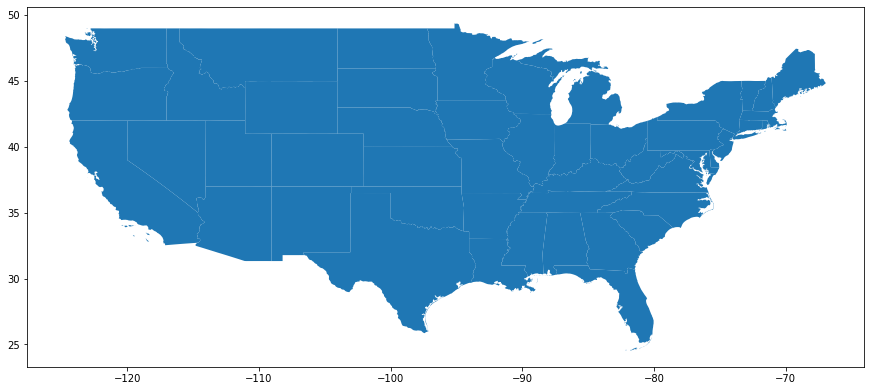

In [30]:
nation.plot(figsize=(15,15))

In [31]:
!wget https://github.com/louisnoel/RCEL506_Project/archive/refs/heads/main.zip

--2022-10-12 23:48:24--  https://github.com/louisnoel/RCEL506_Project/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/louisnoel/RCEL506_Project/zip/refs/heads/main [following]
--2022-10-12 23:48:25--  https://codeload.github.com/louisnoel/RCEL506_Project/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [       <=>          ]  26.45M  7.38MB/s    in 3.6s    

2022-10-12 23:48:28 (7.38 MB/s) - ‘main.zip’ saved [27737989]



In [32]:
!unzip /content/main.zip

Archive:  /content/main.zip
c707348cc902119d1be0b7ed3e9f2a9c186e0f8e
   creating: RCEL506_Project-main/
  inflating: RCEL506_Project-main/RCEL 506_CCS Analysis.ipynb  
 extracting: RCEL506_Project-main/README.md  
   creating: RCEL506_Project-main/SHP files/
  inflating: RCEL506_Project-main/SHP files/cb_2021_us_concity_500k.shp  
  inflating: RCEL506_Project-main/SHP files/cb_2021_us_county_500k.shp  
  inflating: RCEL506_Project-main/SHP files/cb_2021_us_nation_5m.shp  
  inflating: RCEL506_Project-main/SHP files/cb_2021_us_state_500k.shp  
 extracting: RCEL506_Project-main/SHP files/initialize.txt  
  inflating: RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502 2.json  
  inflating: RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502.geojson  
  inflating: RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502.json  
  inflating: RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502.shp  
  inflating: RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502.shx  
  

In [33]:
saline = gpd.read_file('/content/RCEL506_Project-main/SHP files/natcarb_saline_poly_v1502.json')

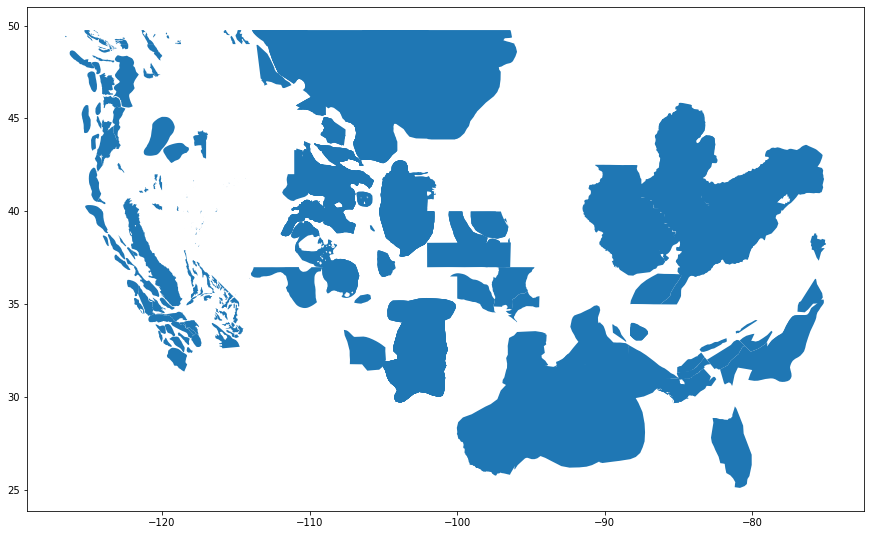

In [34]:
saline.plot(figsize=(15,15))

In [35]:
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 3.9 MB/s 


In [36]:
!pip install pyproj
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 


In [37]:
saline.head()

,partnership,arra_project,resource_name,basin_name,assessed,cycle_of_last_update,overlap,duplicate,shape_length,shape_area,featid,geometry
0,MGSC,None,Mt. Simon Sandstone,None,1,"Atlas V, v1",1,0,3.377563e+06,3.346274e+11,1,"POLYGON ((-87.79807 42.47172, -87.79867 42.464..."
1,WESTCARB,None,Arizona,None,0,"Atlas IV, v1",1,0,1.612804e+06,7.325283e+10,2,"POLYGON ((-112.23726 36.99549, -111.68568 37.0..."
2,WESTCARB,None,Methow,None,0,"Atlas IV, v1",0,0,4.685708e+05,6.494170e+09,7,"POLYGON ((-120.41238 48.82098, -120.40709 48.8..."
3,WESTCARB,None,Nanaimo Subbasin,None,0,"Atlas IV, v1",0,0,1.664946e+06,5.423560e+09,9,"POLYGON ((-124.15262 49.34557, -124.15748 49.3..."
4,WESTCARB,None,Nanaimo Subbasin,None,0,"Atlas IV, v1",0,0,1.664946e+06,5.423560e+09,9,"POLYGON ((-124.15006 49.33914, -124.14671 49.3..."


In [38]:
nation.crs = 'EPSG:4326'

In [39]:
co2_geo = co2_facilities

In [40]:
co2_geo['geometry'] = co2_geo.apply(lambda x: Point((x.Longitude,x.Latitude)),axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
co2_geo.head()

,Facility Name,City,State,Zip Code,Latitude,Longitude,Industry Type (subparts),Industry Type (sectors),Total reported direct emissions,CO2 emissions (non-biogenic),Biogenic CO2 emissions (metric tons),geometry
Facility Id,,,,,,,,,,,,
1000112,23rd and 3rd,BROOKLYN,NY,11232,40.66,-74.00,"C,D",Power Plants,60819.70,60751.2,NaN,POINT (-74 40.66)
1013621,3Bear Libby Gas Plant,Hobbs,NM,88240,32.54,-103.52,"C,W-PROC",Petroleum and Natural Gas Systems,40521.81,39555.5,NaN,POINT (-103.52 32.54)
1003742,31st Street Landfill,WESTCHESTER,IL,60154,41.84,-87.92,"C,HH",Waste,100500.95,334.9,NaN,POINT (-87.92 41.84)
1003188,3M BROWNWOOD,BROWNWOOD,TX,76801,31.67,-99.00,"C,N",Minerals,29359.64,29329.5,NaN,POINT (-99 31.67)
1005043,3M CO,MAPLEWOOD,MN,55144,44.95,-93.00,C,Other,82308.24,82223.0,NaN,POINT (-93 44.95)


In [42]:
type(co2_geo)

pandas.core.frame.DataFrame

In [43]:
co2_gdf = gpd.GeoDataFrame(co2_geo,crs = {'init':'epsg:4326'},geometry=co2_geo.geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [44]:
co2_geo_contig = co2_geo[co2_geo.State != 'HI']

In [45]:
co2_geo_contig = co2_geo_contig[co2_geo_contig.State != 'AK']

In [46]:
co2_geo.State.unique()

array(['NY', 'NM', 'IL', 'TX', 'MN', 'WY', 'AL', 'WI', 'AR', 'MO', 'NC',
       'MI', 'IN', 'PR', 'SD', 'MD', 'IA', 'LA', 'OH', 'TN', 'GA', 'VA',
       'CA', 'HI', 'KY', 'KS', 'NE', 'WA', 'WV', 'PA', 'ND', 'OR', 'ID',
       'AK', 'OK', 'CO', 'NH', 'FL', 'NJ', 'MS', 'AZ', 'NV', 'SC', 'MT',
       'UT', 'CT', 'MA', 'DE', 'RI', 'ME', 'DC', 'GU', 'VI', 'VT'],
      dtype=object)

In [47]:
co2_geo_contig = co2_geo_contig[co2_geo_contig.State != 'GU']

In [48]:
co2_geo_contig = co2_geo_contig[co2_geo_contig.State != 'PR']

In [49]:
co2_geo_contig = co2_geo_contig[co2_geo_contig.State != 'VI']

In [50]:
co2_contig_gdf = gpd.GeoDataFrame(co2_geo_contig,crs = {'init':'epsg:4326'},geometry=co2_geo_contig.geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(-129.5582394831014,
 -63.968545262709455,
 23.284211662227243,
 51.01594634940122)

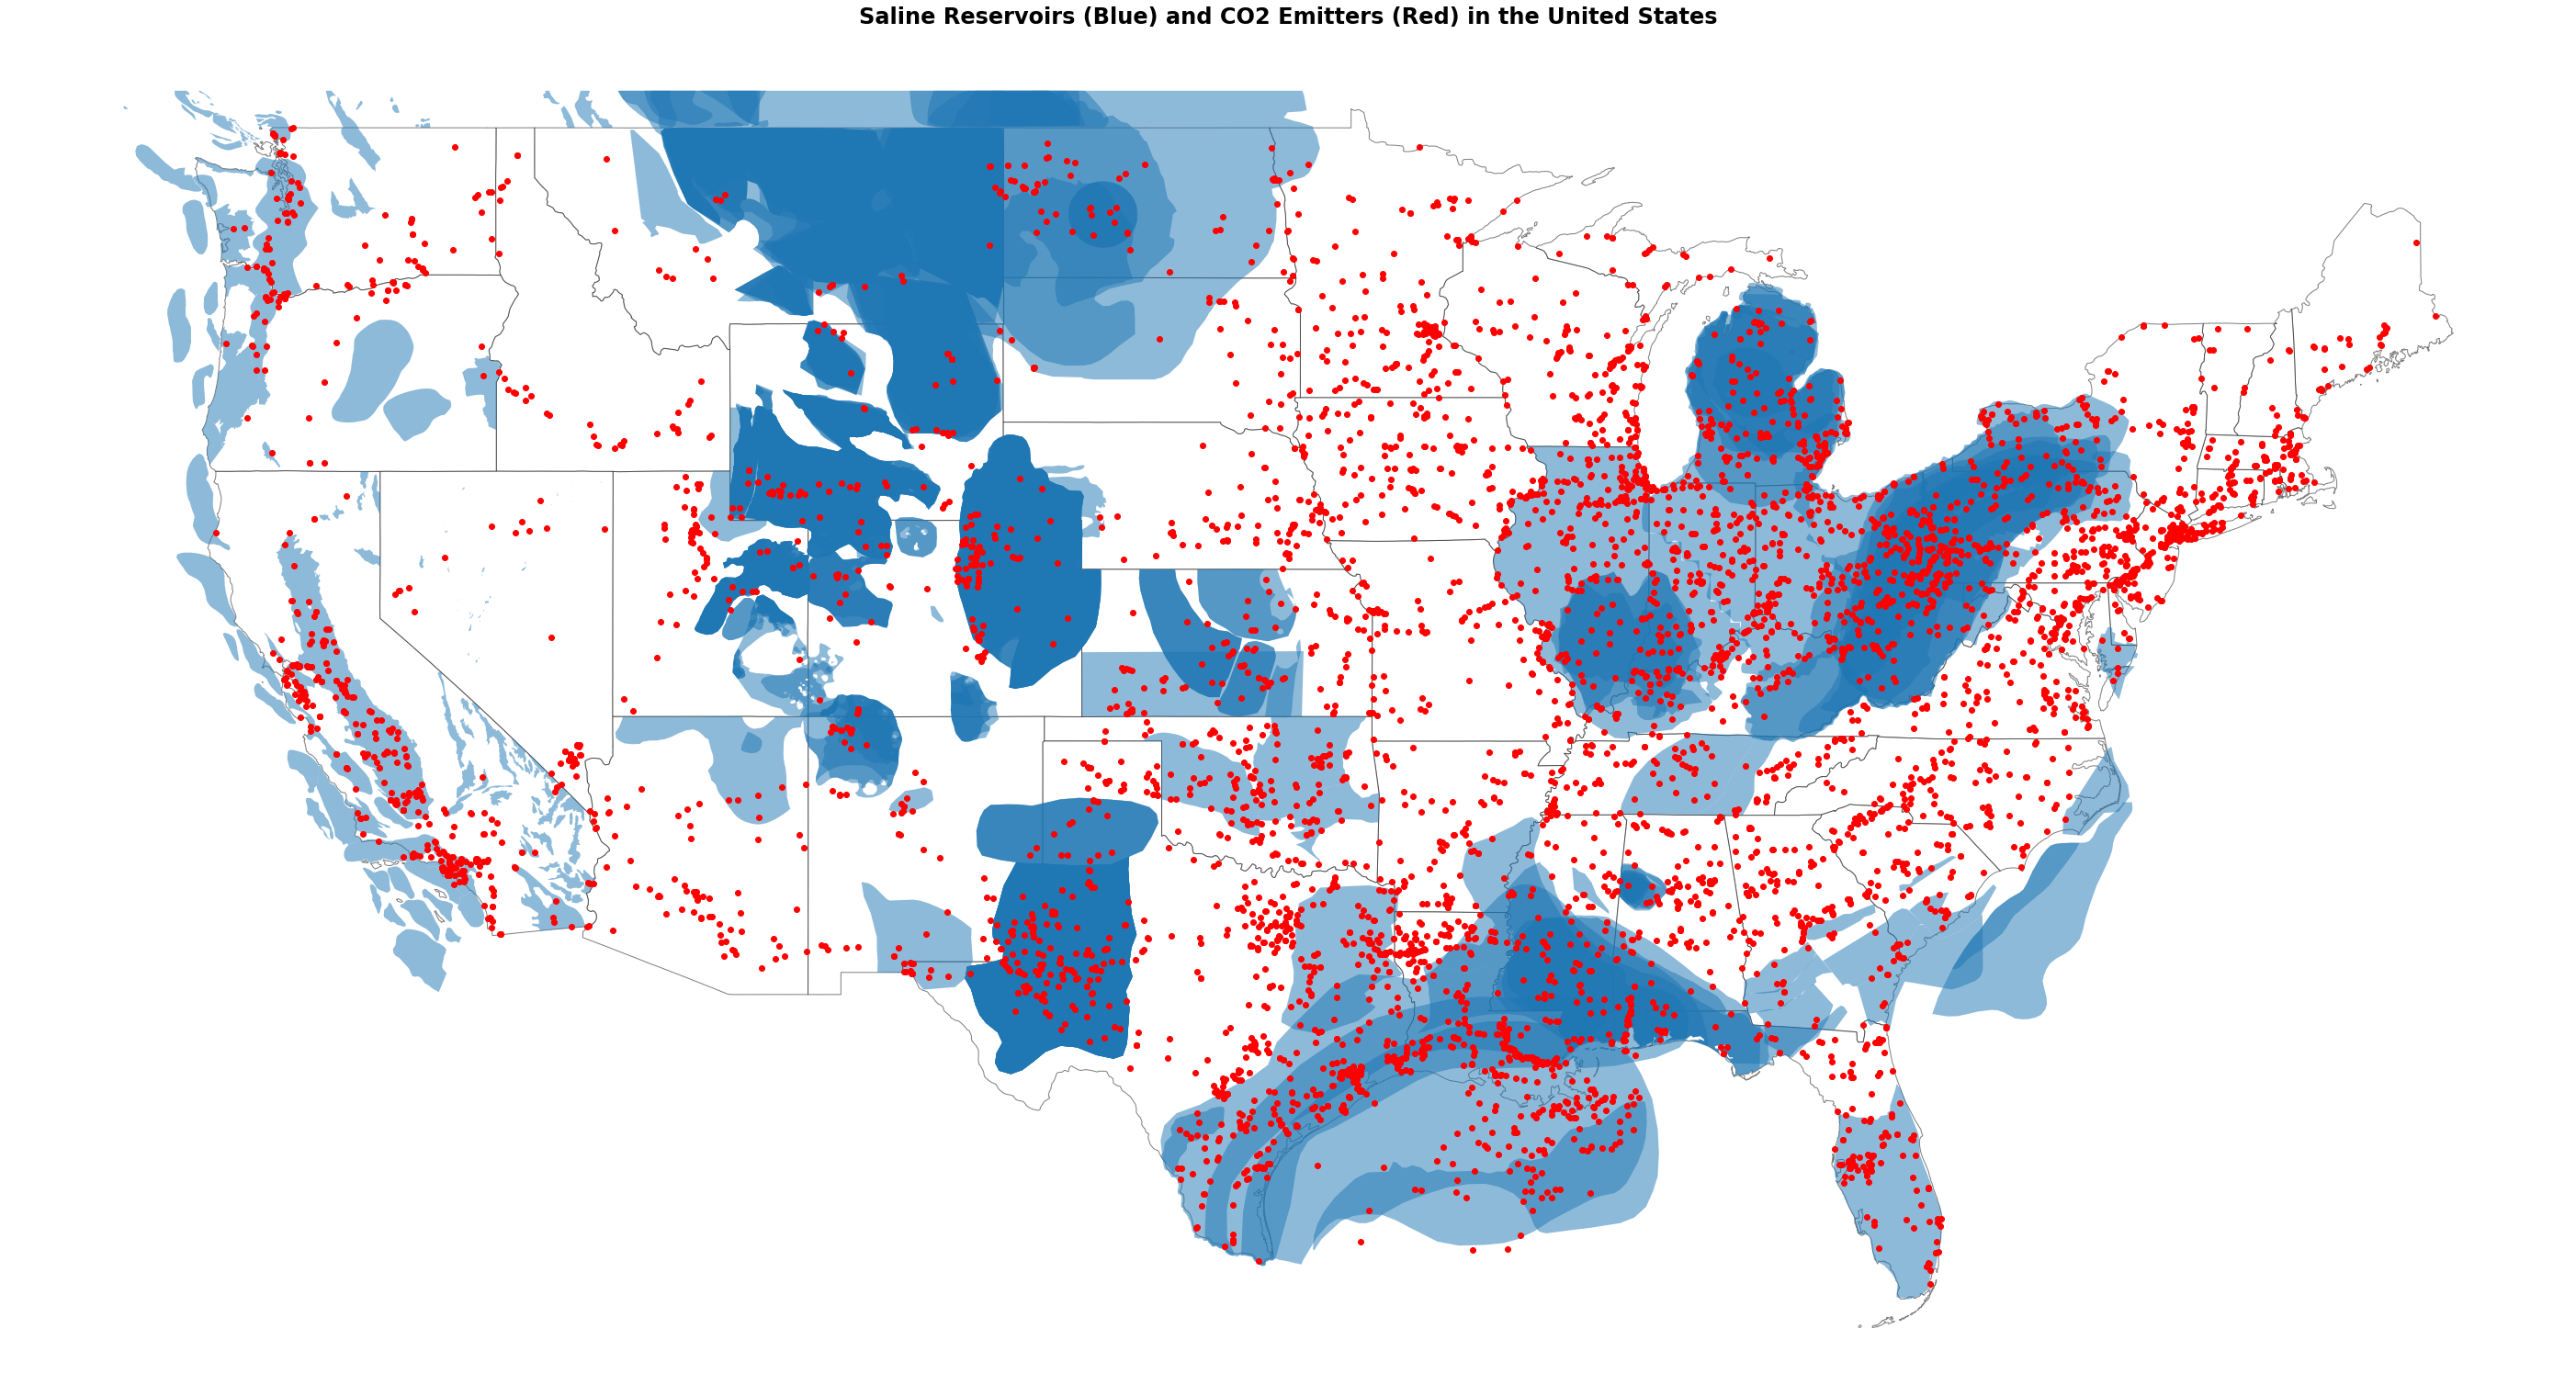

In [51]:
fig, ax = plt.subplots(figsize=(50, 50))
nation.plot(ax=ax, facecolor='w', edgecolor='k', alpha=0.5) #nation in black
saline.plot(ax=ax, alpha=0.5) # saline reservoirs in blue
co2_contig_gdf.plot(ax=ax, color='r')
ax.set_title('Saline Reservoirs (Blue) and CO2 Emitters (Red) in the United States',fontsize = 24, fontweight='bold');
plt.axis('off')

In [52]:
co2_contig_gdf['Total reported direct emissions']

Facility Id
1000112     60819.70
1013621     40521.81
1003742    100500.95
1003188     29359.64
1005043     82308.24
             ...    
1010592     22359.12
1000805    325679.42
1001464         0.00
1012625    650907.10
1011696     89476.75
Name: Total reported direct emissions, Length: 5786, dtype: float64

In [62]:
sns.set(rc={"figure.figsize":(32, 16)})

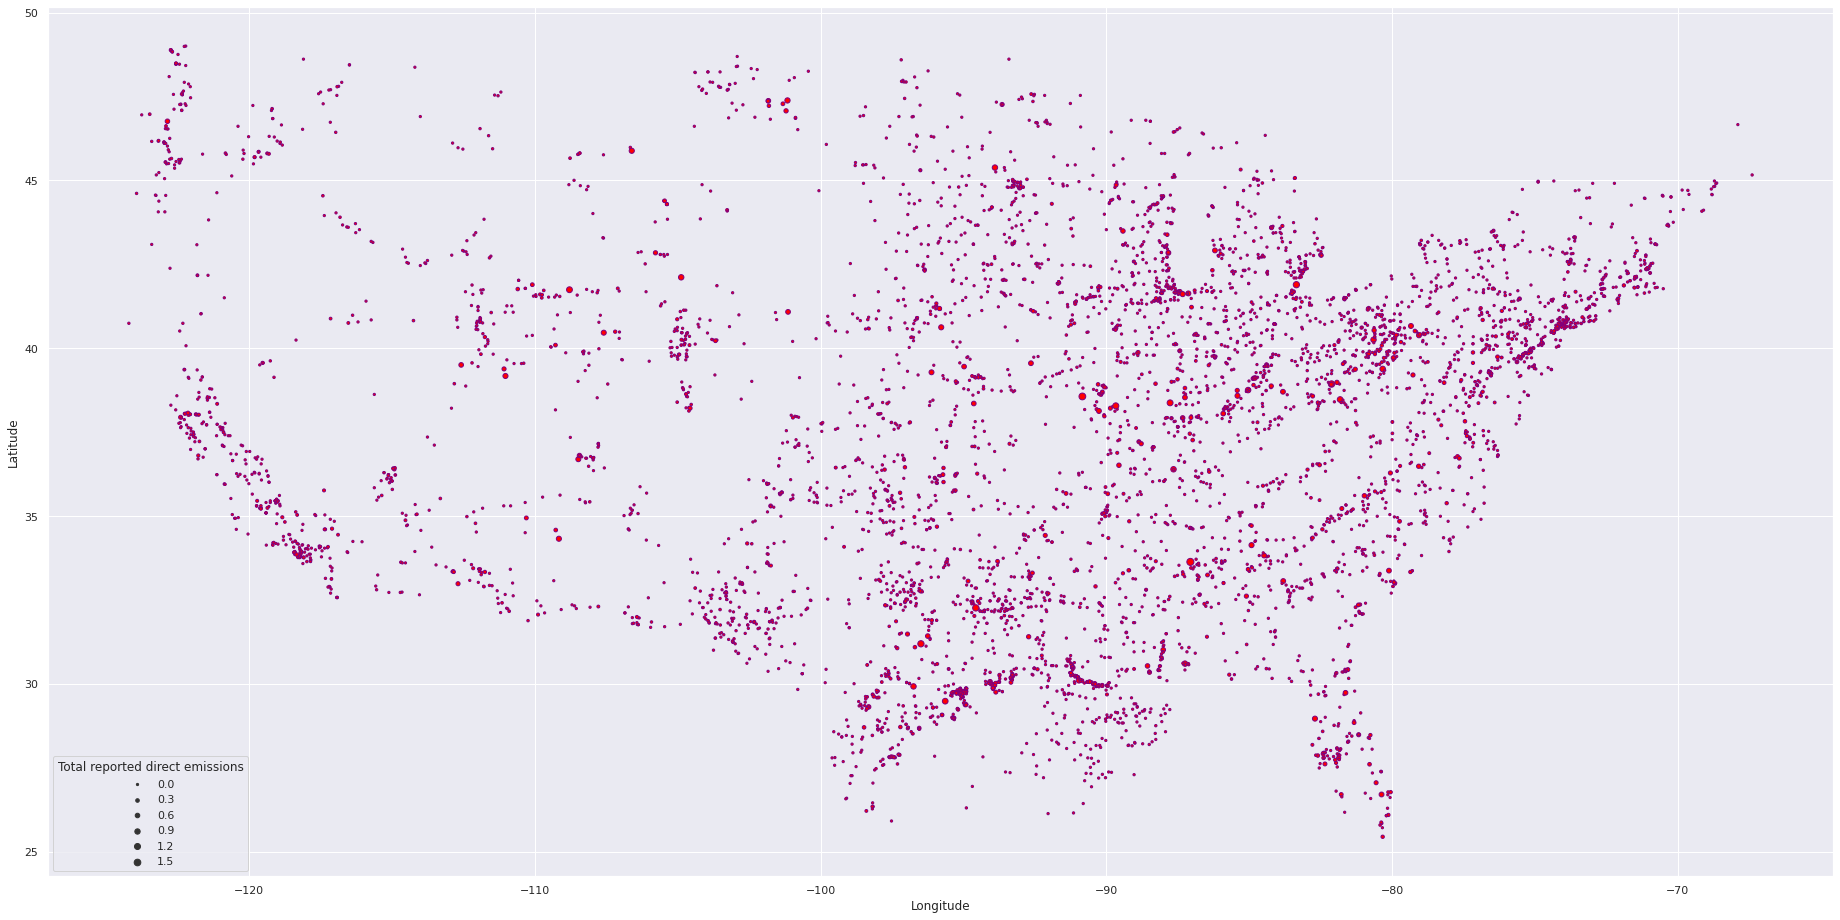

In [77]:
sns.scatterplot(data=co2_geo_contig, x='Longitude', y='Latitude', color='Red', edgecolor='Purple',linewidth=1, size='Total reported direct emissions', sizes = (5, 50))

(-129.5582394831014,
 -63.968545262709455,
 23.284211662227243,
 51.01594634940122)

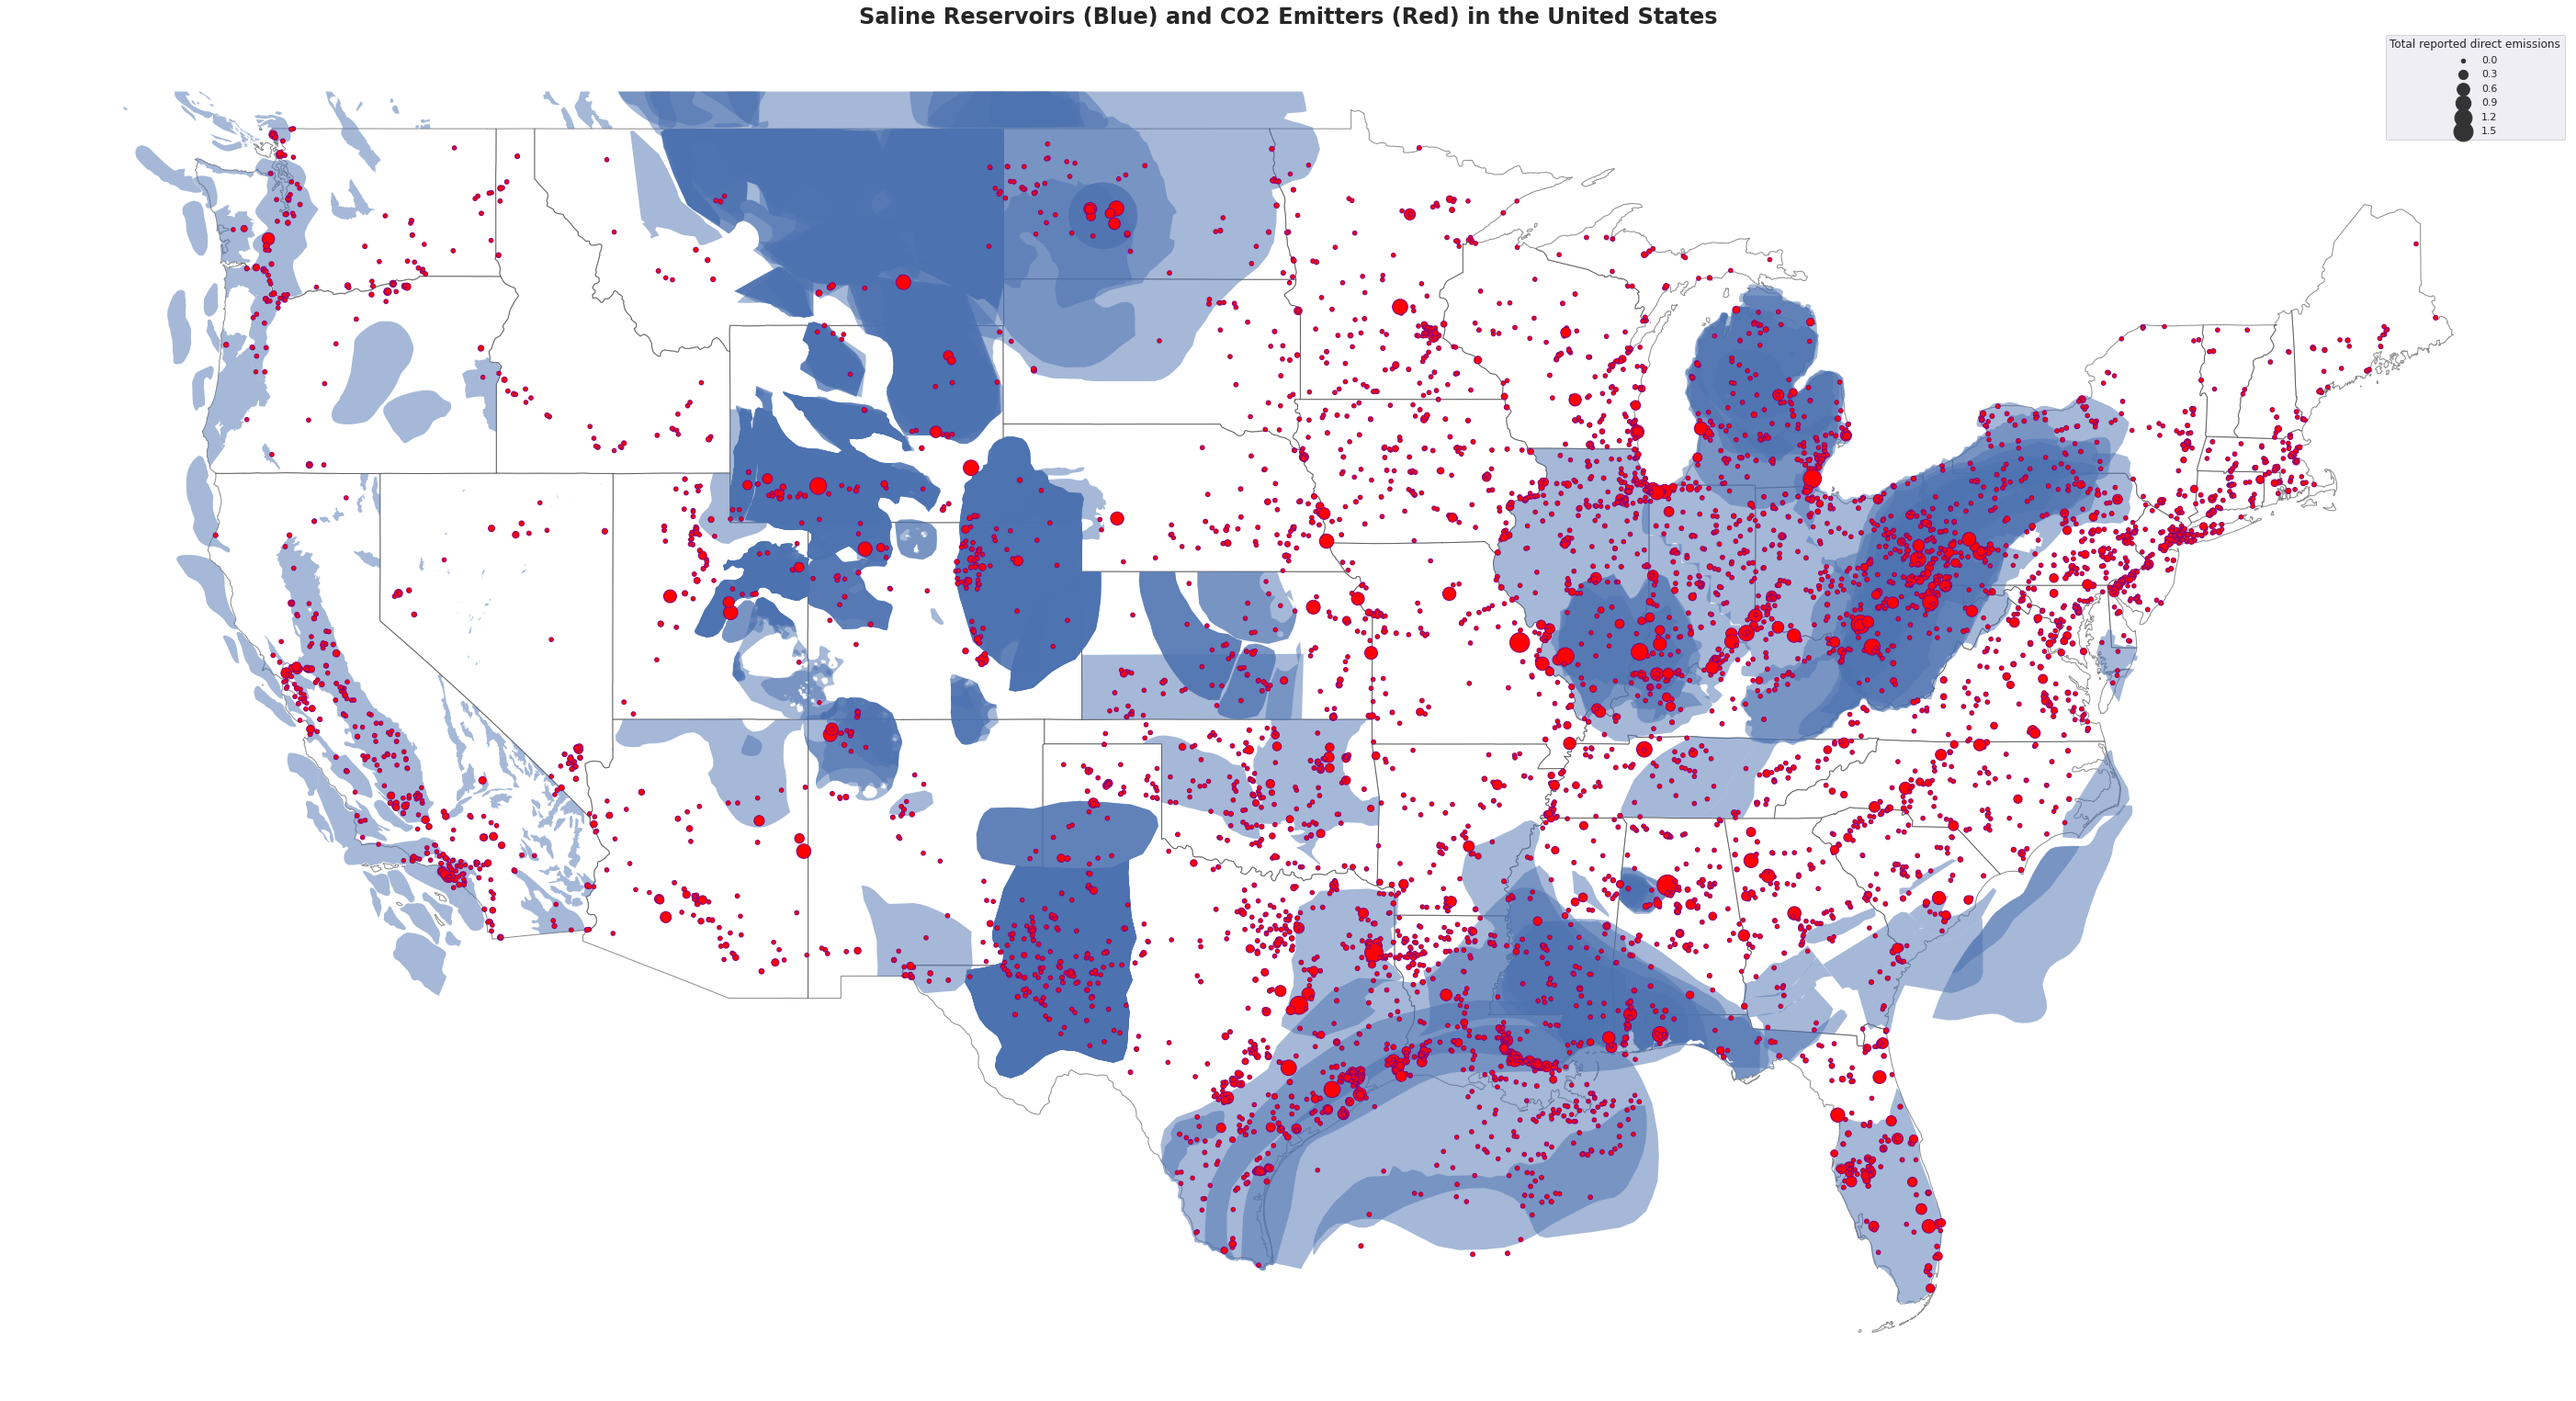

In [83]:
fig, ax = plt.subplots(figsize=(50, 50))
nation.plot(ax=ax, facecolor='w', edgecolor='k', alpha=0.5) #nation in black
saline.plot(ax=ax, edgecolor='k', linewidth=0, alpha=0.5) # saline reservoirs in blue
sns.scatterplot(data=co2_geo_contig, x='Longitude', y='Latitude', color='Red', edgecolor='Purple',linewidth=1, size='Total reported direct emissions', sizes = (20, 500))
ax.set_title('Saline Reservoirs (Blue) and CO2 Emitters (Red) in the United States',fontsize = 24, fontweight='bold');
plt.axis('off')